In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch
from utils import *

## Create Kernel Data

In [2]:
X_list = []
dataPathList = ["/Users/macbook/Documents/medical-image-process/DKL/data/AD_CN/CSF.csv",
                "/Users/macbook/Documents/medical-image-process/DKL/data/AD_CN/GM.csv",
                "/Users/macbook/Documents/medical-image-process/DKL/data/AD_CN/MRI.csv",
                "/Users/macbook/Documents/medical-image-process/DKL/data/AD_CN/PET.csv",
                "/Users/macbook/Documents/medical-image-process/DKL/data/AD_CN/SNP.csv"]
labelPath = "/Users/macbook/Documents/medical-image-process/DKL/data/AD_CN/AD_CN_label.csv"

for dataPath in dataPathList:
    data = load_data(dataPath, input=True)
    X_list.append(data)

y = load_data(labelPath, input=False)

In [3]:
def gt_kernel(y):
  label_encoder = LabelEncoder()
  encoded_labels = label_encoder.fit_transform(y)
  encoded_new_label = encoded_labels*2-1
  y = encoded_new_label.reshape(1,-1)
  K = y.T @ y
  # K = np.zeros(len(y)) + np.eye(len(y))
  # for i in range(len(y)):
  #   for j in range(i+1, len(y)):
  #     if y[i] == y[j]:
  #       K[i,j] = K[j,i] = 1
  return K
def multimodal_supervised_kernel(X_list,y,random_state=42):
    K_X = []
    # Z = np.array(range(len(y)))
    indices = np.argsort(y)
    for X in X_list:
        K,K_train, K_val,K_test,Z_ = supervised_kernel(X,y,random_state,indices=indices)
        K_X.append(K)
    K_X = np.stack(K_X)
    print(K_X.shape)
    K_X = torch.from_numpy(K_X)
    # print(Z_.shape,np.array(y).shape) 
    y = np.array(y)[indices]
    y_kernel = gt_kernel(y)
    y_kernel = torch.tensor(y_kernel)
    y_kernel = y_kernel.unsqueeze(dim=0)
    y_kernel = torch.tensor(y_kernel,  dtype=torch.float32)
    K_X = torch.tensor(K_X,  dtype=torch.float32)
    return K_X, y_kernel, Z_

Accuracy test: 0.89
Classification Report test:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.89      0.89      0.89        19

    accuracy                           0.89        37
   macro avg       0.89      0.89      0.89        37
weighted avg       0.89      0.89      0.89        37

Validation
All
Confusion Matrix:
[[117   4]
 [  9 101]]
Validation
Confusion Matrix:
[[16  2]
 [ 2 17]]
Testing
Confusion Matrix:
[[20  2]
 [ 7 18]]
Accuracy test: 0.65
Classification Report test:
              precision    recall  f1-score   support

           0       0.61      0.78      0.68        18
           1       0.71      0.53      0.61        19

    accuracy                           0.65        37
   macro avg       0.66      0.65      0.64        37
weighted avg       0.66      0.65      0.64        37

Validation
All
Confusion Matrix:
[[115   6]
 [ 21  89]]
Validation
Confusion Matrix:
[[14  4]
 [ 9 10

/var/folders/nh/z1g_ml250lv6zh5s47m6cp3w0000gn/T/ipykernel_3155/689809314.py:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_kernel = torch.tensor(y_kernel,  dtype=torch.float32)
/var/folders/nh/z1g_ml250lv6zh5s47m6cp3w0000gn/T/ipykernel_3155/689809314.py:29: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  K_X = torch.tensor(K_X,  dtype=torch.float32)


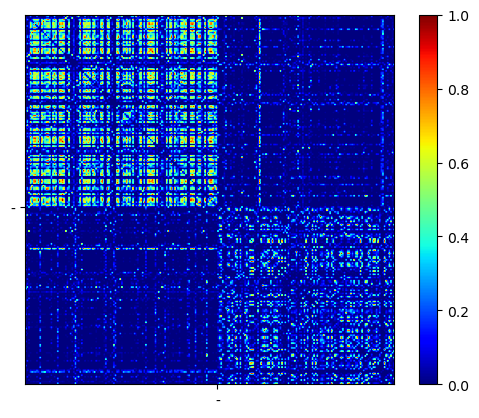

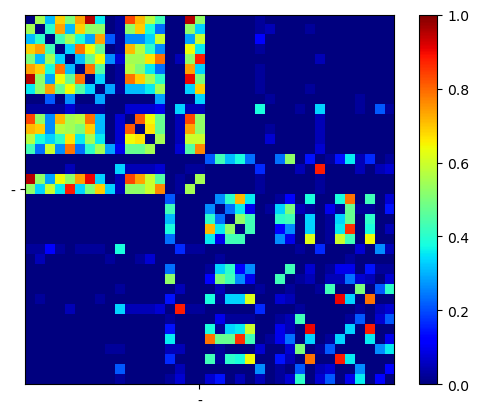

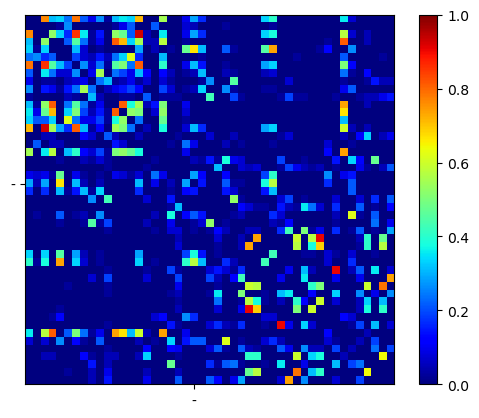

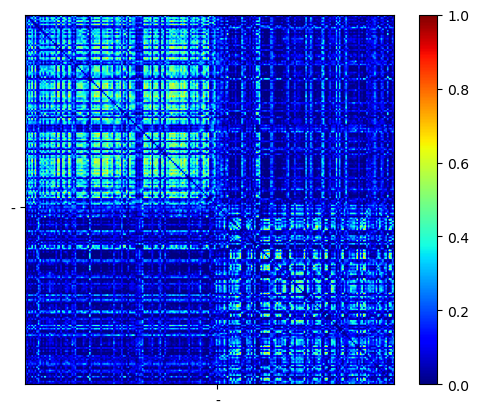

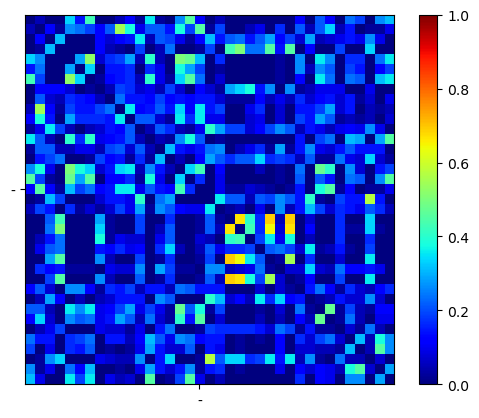

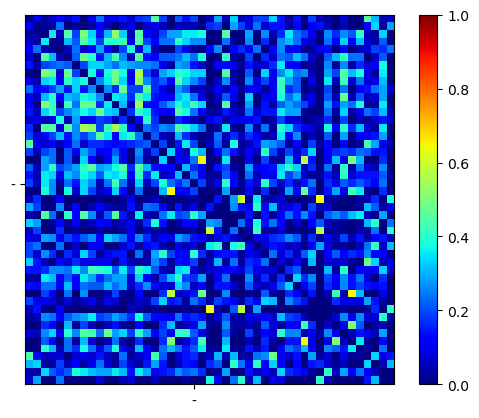

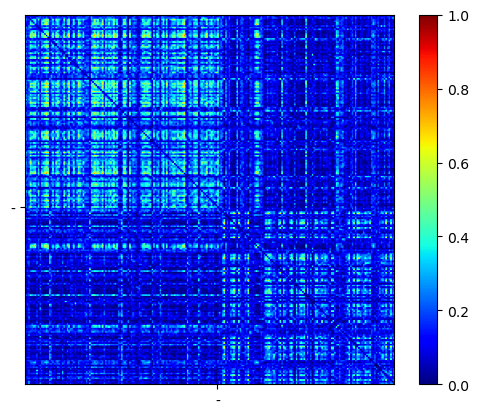

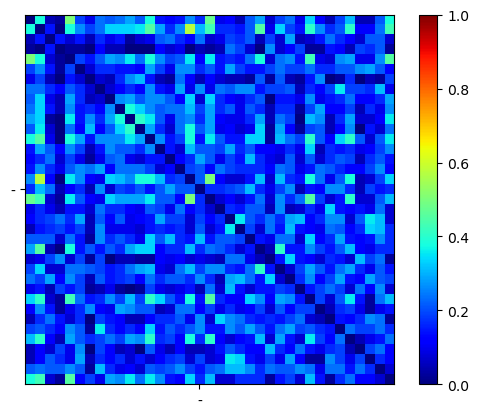

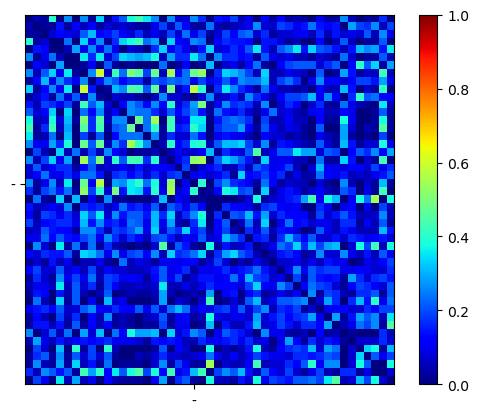

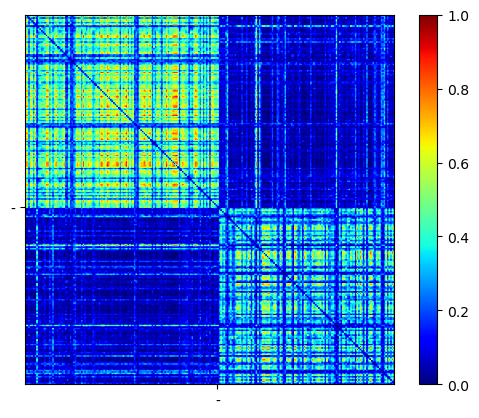

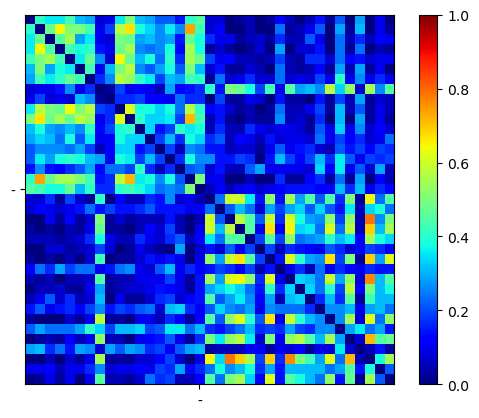

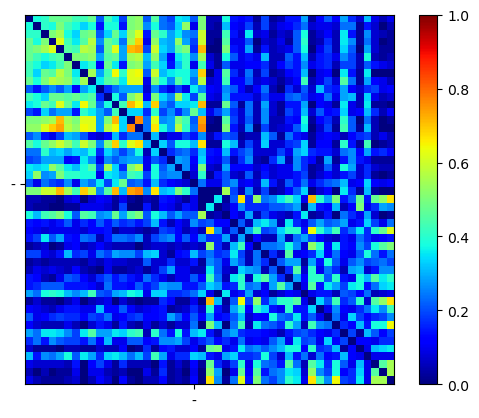

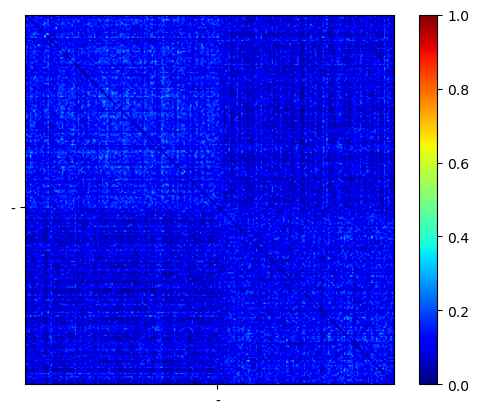

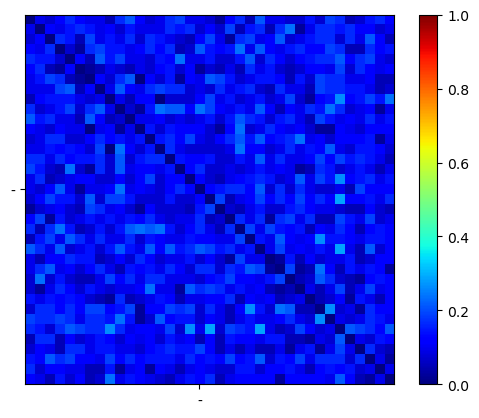

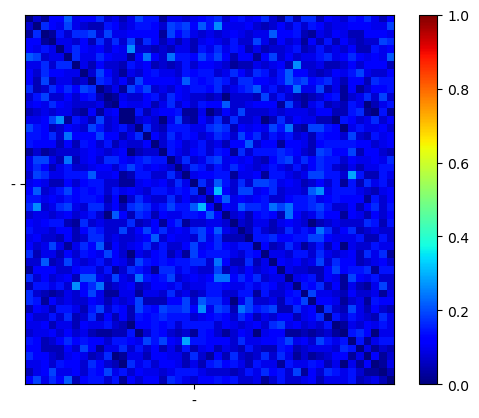

In [4]:
K_X, K_y, Z = multimodal_supervised_kernel(X_list,y)


In [5]:
K_X.shape, K_y.shape

(torch.Size([5, 231, 231]), torch.Size([1, 231, 231]))

#### Save Z

In [6]:
# Save tuple Z
import pickle
# Write it to file
# with open('Z.pkl', 'wb') as f:
#     pickle.dump(Z, f)

# Read it back in
with open('data/KernelData/Z.pkl', 'rb') as f:
    Z = pickle.load(f)

#### Save K_x, K_y

In [7]:
torch.save(K_X, 'K_X.pt')
torch.save(K_y, 'K_y.pt')